<a href="https://colab.research.google.com/github/noobprogrammertryingtosurvive/ADALL_github/blob/main/Cogels_CDA1C03_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import userdata
from openai import OpenAI
import pandas as pd


# Load key from Google Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')


client = OpenAI(
    # This is the default and can be omitted
    api_key=api_key,
)
github_raw_url = 'https://raw.githubusercontent.com/noobprogrammertryingtosurvive/ADALL_github/main/taiwanese+bankruptcy+prediction.csv'
df = pd.read_csv(github_raw_url)
print("Successfully loaded data from GitHub!")

# Convert the first few rows to a string to send to OpenAI
data_preview = df.head(10).to_csv(index=False)
print(data_preview)

Successfully loaded data from GitHub!
Bankrupt?, ROA(C) before interest and depreciation before interest, ROA(A) before interest and % after tax, ROA(B) before interest and depreciation after tax, Operating Gross Margin, Realized Sales Gross Margin, Operating Profit Rate, Pre-tax net Interest Rate, After-tax net Interest Rate, Non-industry income and expenditure/revenue, Continuous interest rate (after tax), Operating Expense Rate, Research and development expense rate, Cash flow rate, Interest-bearing debt interest rate, Tax rate (A), Net Value Per Share (B), Net Value Per Share (A), Net Value Per Share (C), Persistent EPS in the Last Four Seasons, Cash Flow Per Share, Revenue Per Share (Yuan ¥), Operating Profit Per Share (Yuan ¥), Per Share Net profit before tax (Yuan ¥), Realized Sales Gross Profit Growth Rate, Operating Profit Growth Rate, After-tax Net Profit Growth Rate, Regular Net Profit Growth Rate, Continuous Net Profit Growth Rate, Total Asset Growth Rate, Net Value Growth 

### Exploratory Data Analysis (EDA)

Let's start by understanding the basic structure and statistics of the dataset.

In [2]:
print('Dataset Shape:', df.shape)
print('\nColumn Information:')
df.info()


Dataset Shape: (6819, 96)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                

Next, let's look at the descriptive statistics for the numerical columns.

In [3]:
display(df.describe())

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Let's examine the distribution of the target variable, 'Bankrupt?'.

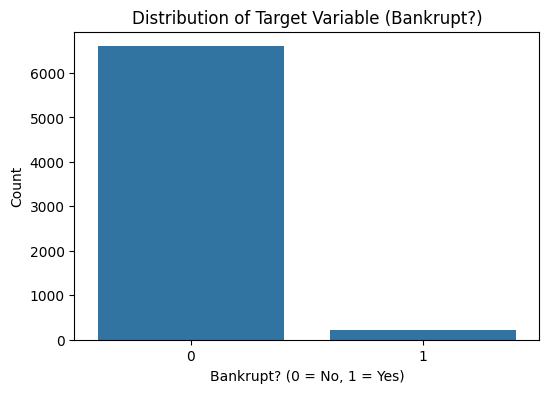


Counts for Bankrupt? column:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Bankrupt?', data=df)
plt.title('Distribution of Target Variable (Bankrupt?)')
plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

print('\nCounts for Bankrupt? column:')
print(df['Bankrupt?'].value_counts())


Finally, let's visualize the correlation matrix to understand the relationships between features and the target variable. Due to the large number of features, this might take a moment to generate and could be quite dense, but it will provide insights into which features are highly correlated with each other and with the target.

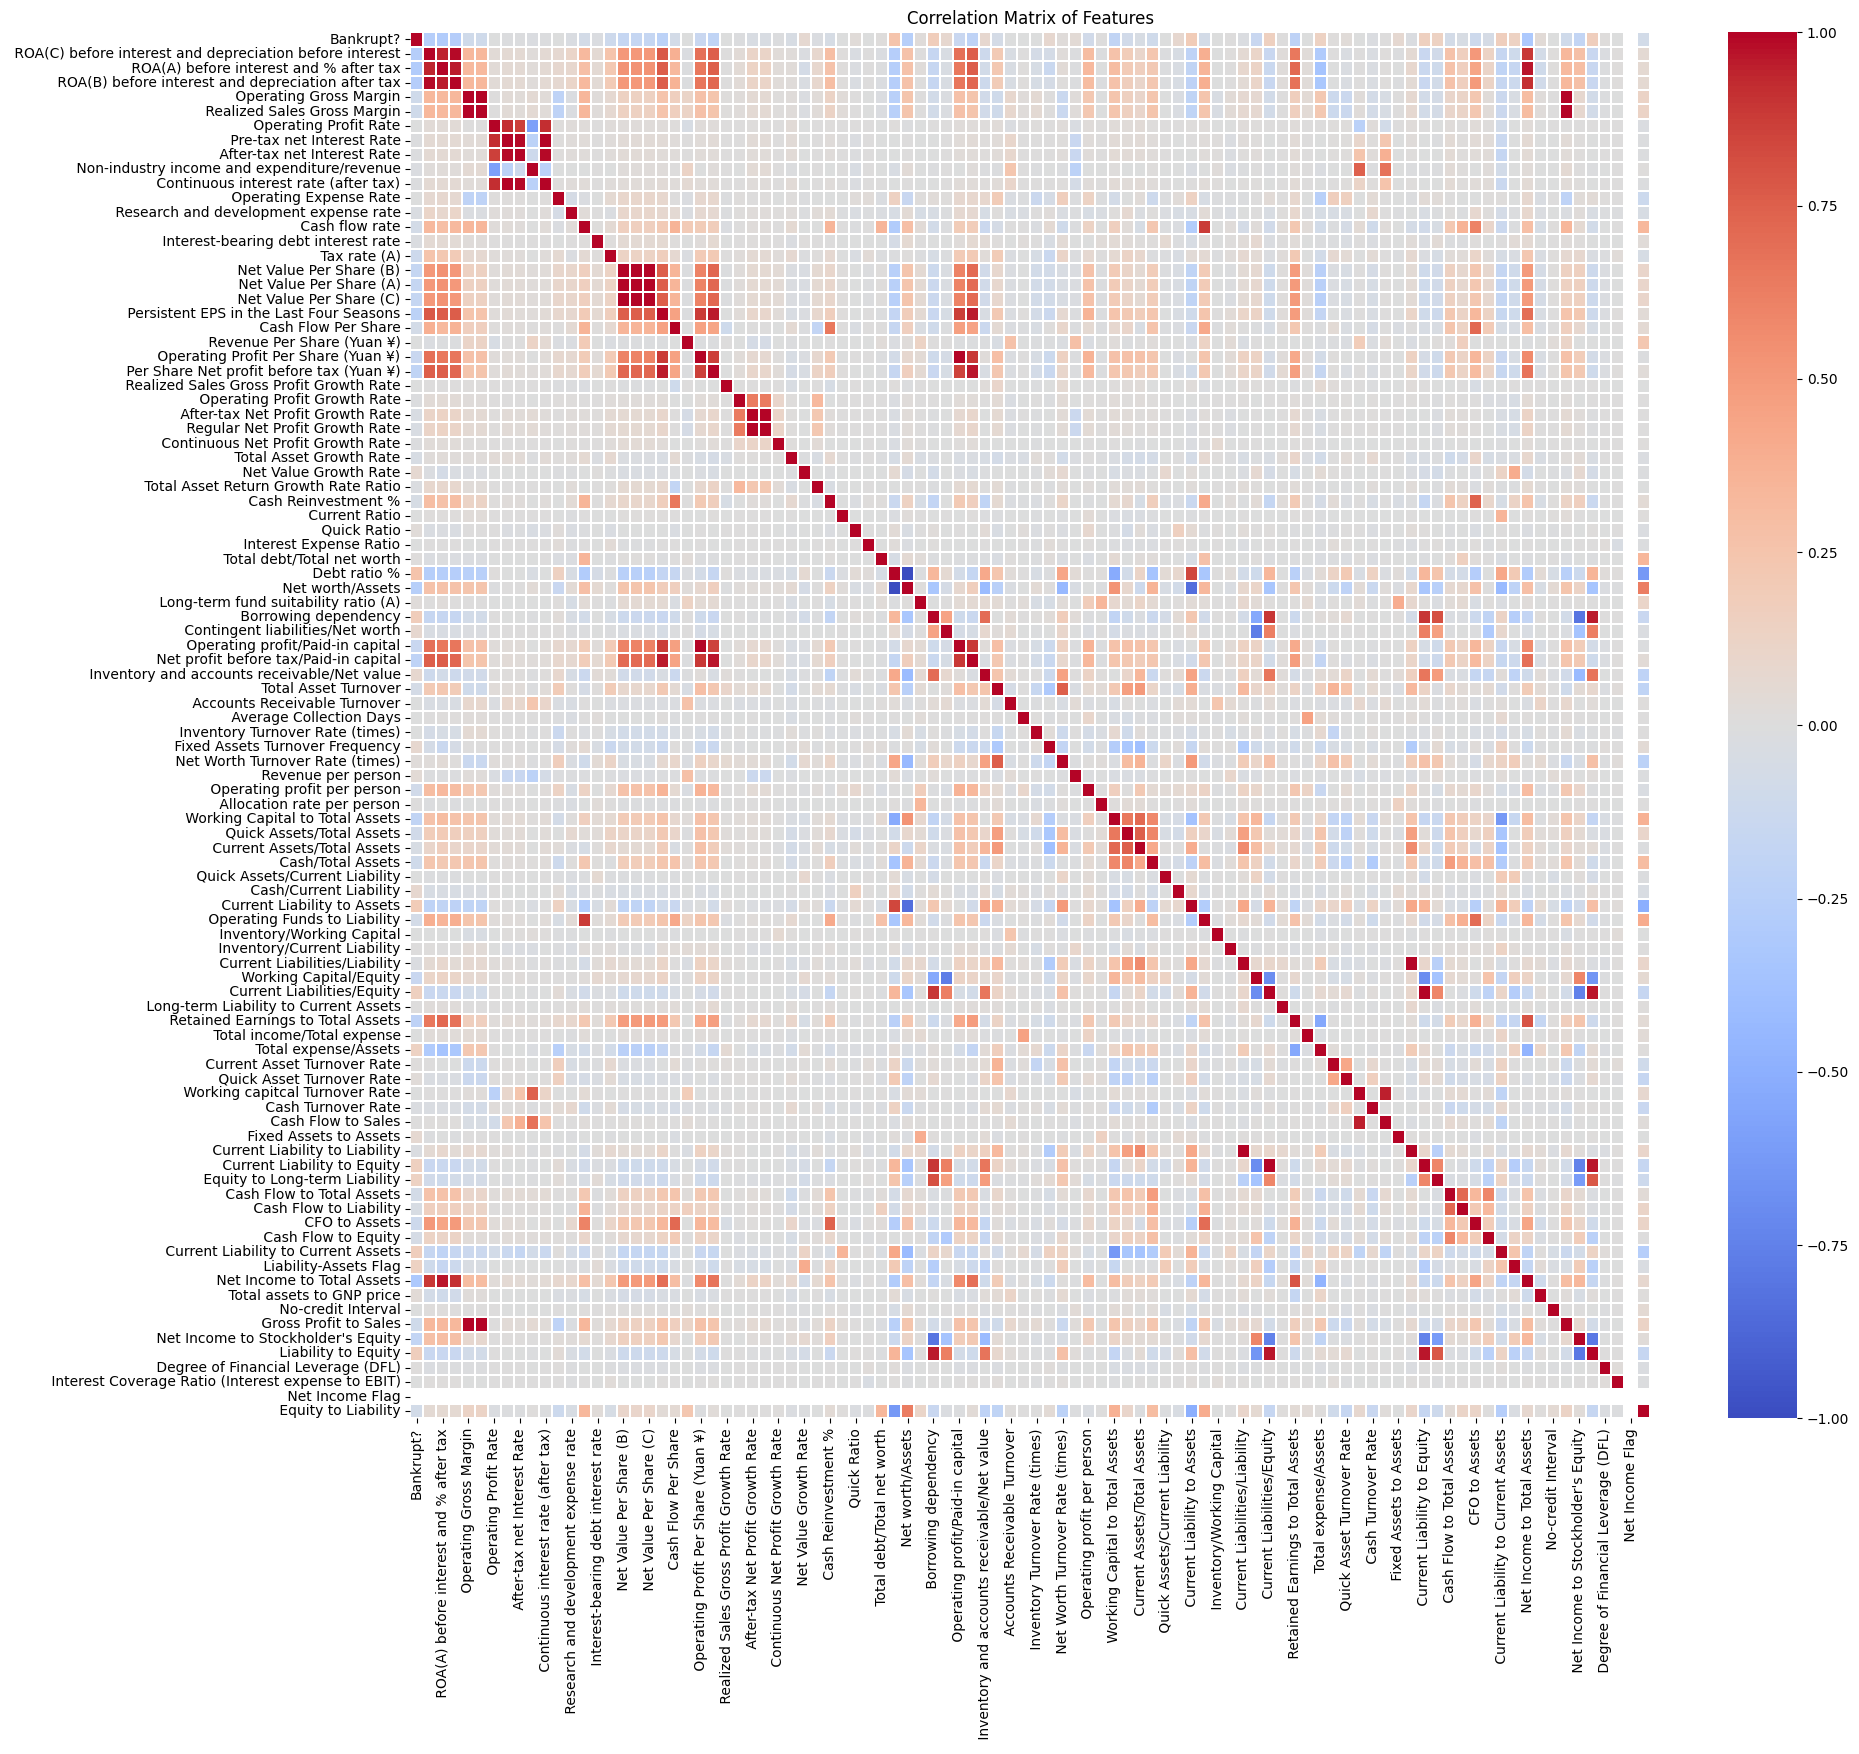

In [5]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(), cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix of Features')
plt.show()

### Normalizing Selected Columns and Integrating into DataFrame

I will now select a few columns from the original DataFrame `df`, apply `StandardScaler` to them, and then integrate these normalized columns back into the main `df` DataFrame. This replaces the original, unscaled values with their standardized counterparts.

### Addressing Class Imbalance: Before Distribution

First, let's re-visualize the original distribution of the `Bankrupt?` target variable to clearly see the imbalance before applying any techniques.

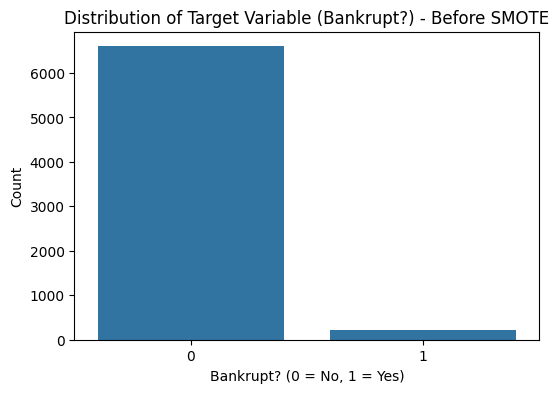


Counts for Bankrupt? column before SMOTE:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Bankrupt?', data=df)
plt.title('Distribution of Target Variable (Bankrupt?) - Before SMOTE')
plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

print('\nCounts for Bankrupt? column before SMOTE:')
print(df['Bankrupt?'].value_counts())

### Strategy 1: Stratified Split

Now, let's split the dataset into training and testing sets while preserving the proportion of each class in both subsets. This is crucial for unbiased model evaluation, especially with imbalanced data.

In [7]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Perform a stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Original dataset shape:', y.value_counts())
print('Training set shape:', y_train.value_counts())
print('Testing set shape:', y_test.value_counts())

Original dataset shape: Bankrupt?
0    6599
1     220
Name: count, dtype: int64
Training set shape: Bankrupt?
0    5279
1     176
Name: count, dtype: int64
Testing set shape: Bankrupt?
0    1320
1      44
Name: count, dtype: int64


### Strategy 2: SMOTE (Synthetic Minority Over-sampling Technique)

Next, we'll apply SMOTE to the **training data only** to balance the classes by creating synthetic samples for the minority class (bankrupt companies). First, we need to install the `imbalanced-learn` library if it's not already installed.

In [8]:
!pip install imbalanced-learn

In [9]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('\nTraining set shape after SMOTE:')
print(y_train_resampled.value_counts())


Training set shape after SMOTE:
Bankrupt?
0    5279
1    5279
Name: count, dtype: int64


### Addressing Class Imbalance: After SMOTE Distribution

Finally, let's visualize the distribution of the `Bankrupt?` target variable in the training set after applying SMOTE. This will show the effect of balancing the classes.

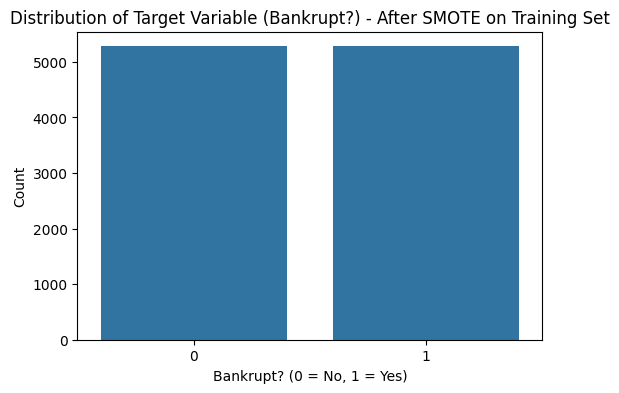

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Target Variable (Bankrupt?) - After SMOTE on Training Set')
plt.xlabel('Bankrupt? (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the columns to be normalized (these were already selected in the previous turn)
selected_columns_to_normalize = [
    ' ROA(C) before interest and depreciation before interest',
    ' Total Asset Growth Rate',
    ' Operating Expense Rate',
    ' Revenue Per Share (Yuan ¥)'
]

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply StandardScaler to the selected columns in the original DataFrame
# and update the DataFrame directly
df[selected_columns_to_normalize] = scaler.fit_transform(df[selected_columns_to_normalize])

print("DataFrame after normalizing selected columns (first 5 rows):")
display(df.head())

DataFrame after normalizing selected columns (first 5 rows):


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,-2.217909,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,-0.673828,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,-1.303672,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,-1.735886,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,-0.661778,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Visualization of Data Before and After Normalization

Descriptive Statistics for ' ROA(C) before interest and depreciation before interest' BEFORE Normalization:
count    6819.000000
mean        0.505180
std         0.060686
min         0.000000
25%         0.476527
50%         0.502706
75%         0.535563
max         1.000000
Name:  ROA(C) before interest and depreciation before interest, dtype: float64

Descriptive Statistics for ' ROA(C) before interest and depreciation before interest' AFTER Normalization:
count    6.819000e+03
mean    -1.833928e-16
std      1.000073e+00
min     -8.325144e+00
25%     -4.721818e-01
50%     -4.077099e-02
75%      5.007018e-01
max      8.154428e+00
Name:  ROA(C) before interest and depreciation before interest, dtype: float64


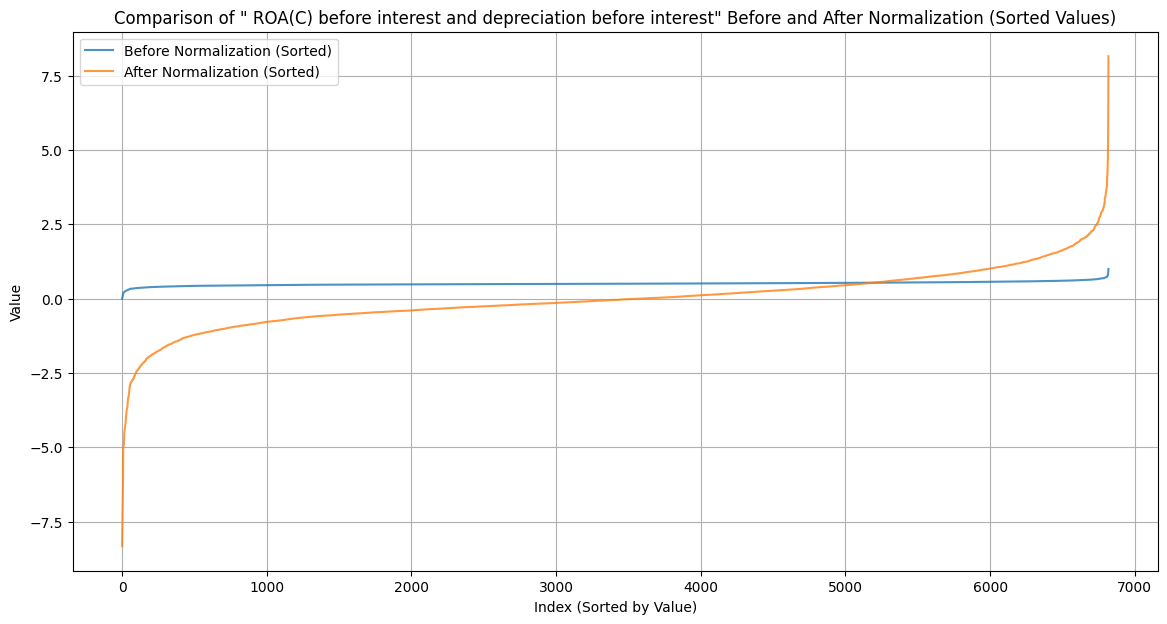

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Choose one of the columns that was normalized
col_name = ' ROA(C) before interest and depreciation before interest'

# Get original values from the X DataFrame (before normalization)
original_values = X[col_name]

# Get normalized values from the df DataFrame (after normalization)
normalized_values = df[col_name]

# Display descriptive statistics for numerical comparison
print(f"Descriptive Statistics for '{col_name}' BEFORE Normalization:")
print(original_values.describe())
print(f"\nDescriptive Statistics for '{col_name}' AFTER Normalization:")
print(normalized_values.describe())

# Plotting the sorted values to show the transformation
plt.figure(figsize=(14, 7))
plt.plot(original_values.sort_values().values, label='Before Normalization (Sorted)', alpha=0.8)
plt.plot(normalized_values.sort_values().values, label='After Normalization (Sorted)', alpha=0.8)
plt.title(f'Comparison of "{col_name}" Before and After Normalization (Sorted Values)')
plt.xlabel('Index (Sorted by Value)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Model 1: Logistic Regression


--- Logistic Regression ---
Accuracy: 0.7588
Precision: 0.0505
Recall: 0.3636
F1-Score: 0.0886


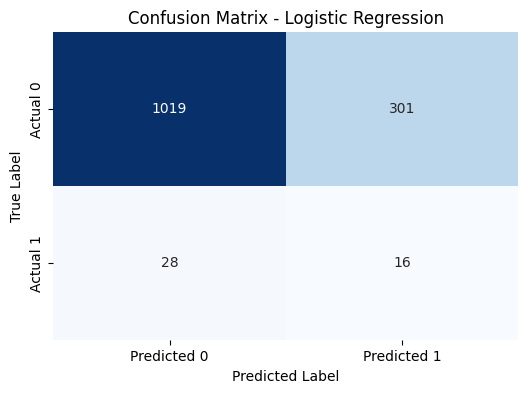

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Logistic Regression ---")

# Initialize and train the Logistic Regression model
# Using 'liblinear' solver for better performance on smaller datasets and binary classification
# 'class_weight="balanced"' can be used if SMOTE wasn't applied, but with SMOTE it might not be strictly necessary
logistic_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logistic):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logistic):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_logistic):.4f}")

# Confusion Matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Model 2: Random Forest Classifier


--- Random Forest Classifier ---
Accuracy: 0.9611
Precision: 0.4262
Recall: 0.5909
F1-Score: 0.4952


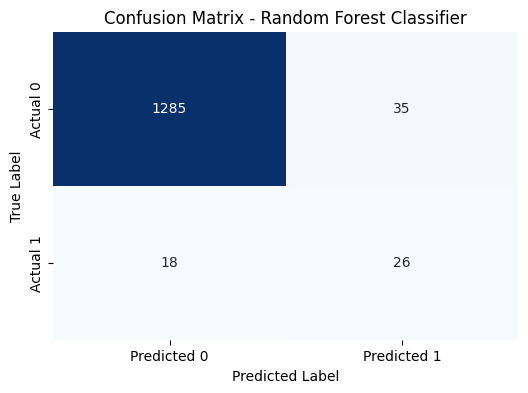

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Random Forest Classifier ---")

# Initialize and train the Random Forest Classifier model
# 'class_weight="balanced"' is useful for imbalanced datasets, even with SMOTE on training data
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
random_forest_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
